In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data

df_agg = pd.read_csv('Aggregated_Metrics_By_Video.csv',encoding='utf-8')
df_agg_country_sub = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv', encoding='utf-8')
df_ts = pd.read_csv('Video_Performance_Over_Time.csv', encoding='utf-8')
df_comments = pd.read_csv('All_Comments_Final.csv', encoding='utf-8')

In [8]:
# Check columns

print(df_agg.columns)
print(df_agg_country_sub.columns)
print(df_ts.columns)
print(df_comments.columns)

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

In [9]:
#the column headers have some extra non-ascii characters, we need to clean them up before we do our analysis
#this goes through each column and removes all the non-ascii characters 

newcols =[x.encode("ascii", "ignore").decode('utf-8') for x in df_agg.columns]
df_agg.columns = newcols

In [11]:
# Describe

df_agg.describe()

,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


(array([201.,  17.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.000000e+00, 2.251200e+03, 4.501400e+03, 6.751600e+03,
        9.001800e+03, 1.125200e+04, 1.350220e+04, 1.575240e+04,
        1.800260e+04, 2.025280e+04, 2.250300e+04, 2.475320e+04,
        2.700340e+04, 2.925360e+04, 3.150380e+04, 3.375400e+04,
        3.600420e+04, 3.825440e+04, 4.050460e+04, 4.275480e+04

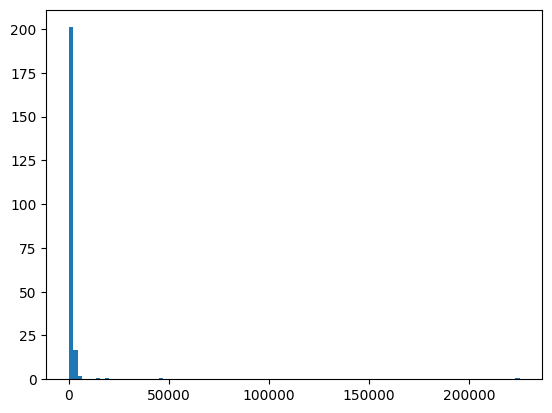

In [15]:
# Histogram

plt.hist(df_agg['Likes'], bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcac6a76220>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcac6a76790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcac6a52f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcac6a76d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcac6a90040>],
 'means': []}

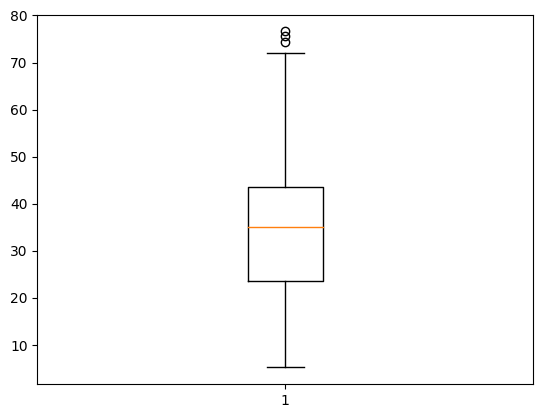

In [16]:
# Box Plot

plt.boxplot(df_agg['Average percentage viewed (%)'])

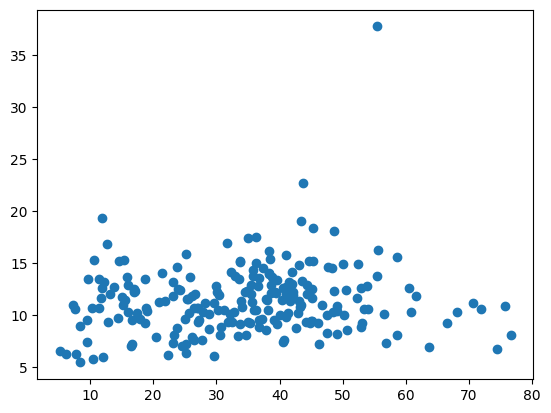

In [17]:
# Scatter Plot

plt.scatter(df_agg['Average percentage viewed (%)'] ,df_agg['CPM (USD)'])

<AxesSubplot:xlabel='RPM (USD)', ylabel='CPM (USD)'>

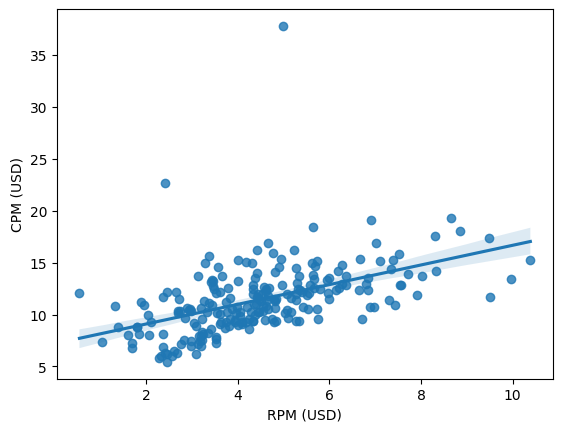

In [19]:
# Seaborn Reg Plot

sns.regplot(x='RPM (USD)',y='CPM (USD)', data = df_agg)

<AxesSubplot:>

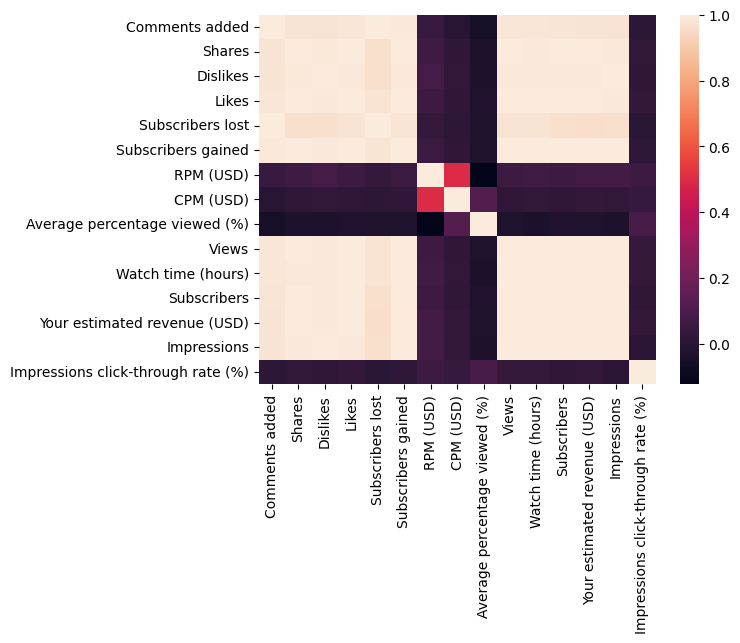

In [20]:
# Correlation Matrix and Heatmap

corr = df_agg.corr()
sns.heatmap(corr)

<AxesSubplot:>

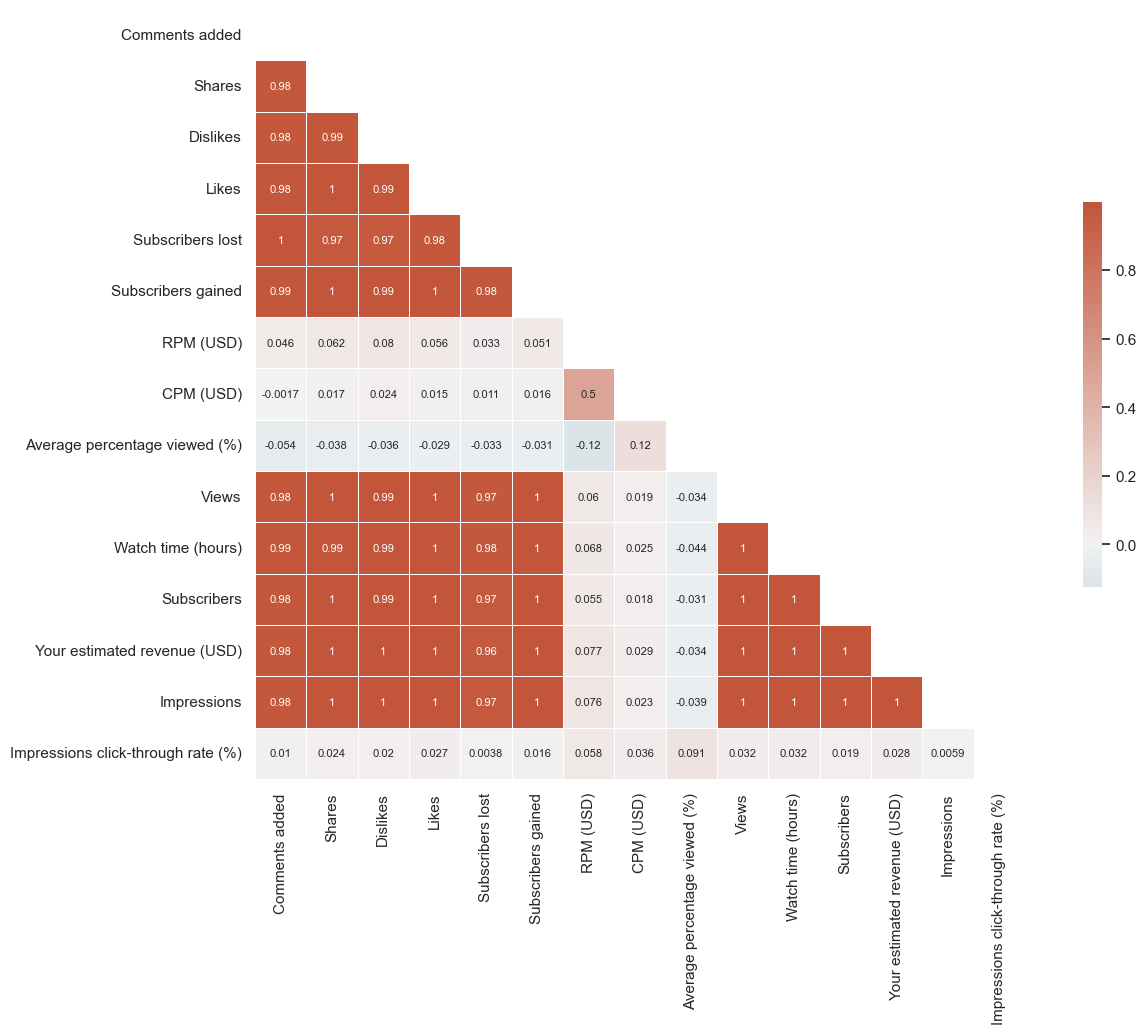

In [21]:
# Advanced Correlation Heatmap

sns.set_theme(style="white")
corr = df_agg.corr()

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

In [23]:
# Pivot table

pd.pivot_table(df_agg_country_sub, index = 'Country Code', values = 'Average View Percentage')

,Average View Percentage
Country Code,
AD,0.346120
AE,0.337669
AF,0.268558
AG,0.387360
AI,0.131323
...,...
YT,0.079946
ZA,0.405515
ZM,0.394836


<AxesSubplot:xlabel='Is Subscribed'>

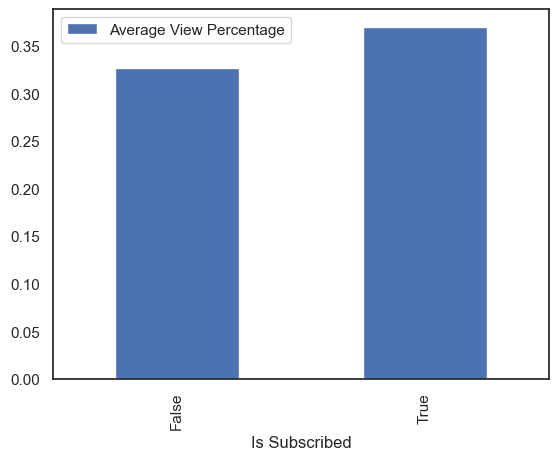

In [24]:
# Bar Plot based on Pivot table

pd.pivot_table(df_agg_country_sub, index = 'Is Subscribed', values = 'Average View Percentage').plot.bar()

<AxesSubplot:xlabel='Date', ylabel='User Subscriptions Removed'>

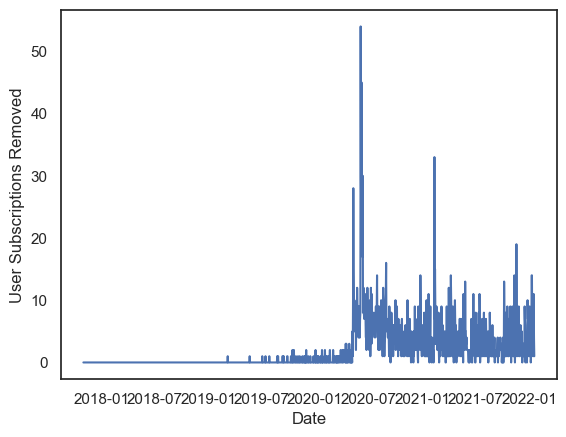

In [26]:
# Line Chart

df_ts['Date'] = pd.to_datetime(df_ts['Date'])
rm_x_date = pd.pivot_table(df_ts, index='Date',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()
sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')